# EDA Oso Trava

@roman

8 sep 2023

In [19]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Read Data

In [11]:
# read from parquets
df_playlist = pd.read_parquet('../../data/scrap_oso_trava/channel_playlists.parquet')
df_videos_urls = pd.read_parquet('../../data/scrap_oso_trava/playlist_videos.parquet')
df_videos_stats = pd.read_parquet('../../data/scrap_oso_trava/videos_stats.parquet')

In [17]:
df_playlist.head()

id                     title  \
0  PL5EDqo-XIoDCg5zTnqp0s6mWMPyex7ukN            CRACKS PODCAST   
1  PL5EDqo-XIoDD76lHHkap8VJYUrFbOIJTj  VENTADE EMPRESA/SUCESION   
2  PL5EDqo-XIoDA4p0_rvpzX64EWjceQtSaR                   EVENTOS   
3  PL5EDqo-XIoDClYjCfhBvS8b9s75A2f-xm        QUIEBRA DE EMPRESA   
4  PL5EDqo-XIoDDtszidkbHpr02sCuqkz38s               Real Estate   

                                         description          published_at  \
0  El mejor podcast de negocios en hablahispana. ...  2023-06-26T03:11:15Z   
1                                                     2023-06-26T03:08:34Z   
2                                                     2023-06-19T13:10:57Z   
3                                                     2023-06-12T13:00:24Z   
4                                                     2023-05-29T13:11:05Z   

   video_count                channel_id  \
0            9  UCWVspRnU4QdsR4Av4tDWWRw   
1            1  UCWVspRnU4QdsR4Av4tDWWRw   
2            2  UCWVspRnU4QdsR4Av4tDWWRw   
3            2  UCWVspRnU4QdsR4Av4tDWWRw   
4            1  UCWVspRnU4QdsR4Av4tDWWRw   

                                           photo_url  
0  https://i.ytimg.com/vi/fL9FNpuGK_8/maxresdefau...  
1  https://i.ytimg.com/vi/YOvk4LpPH8Q/maxresdefau...  
2  https://i.ytimg.com/vi/U4xUJm44gbk/maxresdefau...  
3  https://i.ytimg.com/vi/IfIzcl3k55s/maxresdefau...  
4  https://i.ytimg.com/vi/TUQJEbHMXOA/maxresdefau...

In [13]:
df_videos_urls.head()

id                                              title  \
0  fL9FNpuGK_8  SUSO ZAMORA | Perder a TODA tu FAMILIA, lo que...   
1  uTS8L1kvjmY  SEBASTI√ÅN KREIS | Lecciones de NICO SZEKASY, D...   
2  027NOppIrVQ  FERNANDO LANDEROS | El Infierno en M√©xico, SOU...   
3  2u6FeKJ-biw        LUIS CERVANTES I La INVERSION PERFECTA #236   
4  OGwMD9NMQMA  UPDATE SHOW con Javier Morodo I Shark Tank, MA...   

                                         description          published_at  \
0  Suso Zamora es un inversionista peruano fundad...  2023-08-28T03:19:53Z   
1  Sebastian Kreis es Co-fundador y CEO de Xepeli...  2023-08-07T13:39:30Z   
2  VUELVETE ANGEL DE FREEDOM EN ESTE LINK: üëâ http...  2023-07-24T12:22:59Z   
3  Luis Cervantes en LinkedIn como Luis Cervantes...  2023-07-17T13:23:16Z   
4  Javier es un inversionista mexicano fundador d...  2023-07-10T13:24:55Z   

                          playlist_id                channel_id  \
0  PL5EDqo-XIoDCg5zTnqp0s6mWMPyex7ukN  UCWVspRnU4QdsR4Av4tDWWRw   
1  PL5EDqo-XIoDCg5zTnqp0s6mWMPyex7ukN  UCWVspRnU4QdsR4Av4tDWWRw   
2  PL5EDqo-XIoDCg5zTnqp0s6mWMPyex7ukN  UCWVspRnU4QdsR4Av4tDWWRw   
3  PL5EDqo-XIoDCg5zTnqp0s6mWMPyex7ukN  UCWVspRnU4QdsR4Av4tDWWRw   
4  PL5EDqo-XIoDCg5zTnqp0s6mWMPyex7ukN  UCWVspRnU4QdsR4Av4tDWWRw   

                                           photo_url  
0  https://i.ytimg.com/vi/fL9FNpuGK_8/maxresdefau...  
1  https://i.ytimg.com/vi/uTS8L1kvjmY/maxresdefau...  
2  https://i.ytimg.com/vi/027NOppIrVQ/maxresdefau...  
3  https://i.ytimg.com/vi/2u6FeKJ-biw/maxresdefau...  
4  https://i.ytimg.com/vi/OGwMD9NMQMA/maxresdefau...

In [14]:
df_videos_stats.head()

id                                               tags is_live  \
0  fL9FNpuGK_8  [suso zamora cracks podcast, oso trava, cracks...    none   
1  uTS8L1kvjmY  [sebastian kreis cracks podcast, sebastian kre...    none   
2  027NOppIrVQ  [chobi landeros, fernando landeros cracks podc...    none   
3  2u6FeKJ-biw  [luis cervantes, luis cervantes cracks podcast...    none   
4  OGwMD9NMQMA  [javier morodo cracks podcast, javier martinez...    none   

     duration view_count like_count  dislike_count favorite_count  \
0   PT2H4M44S     182802       8486            NaN              0   
1  PT1H38M44S       9669        198            NaN              0   
2  PT1H38M35S     363888      11248            NaN              0   
3  PT1H32M50S      19170        455            NaN              0   
4     PT1H46M      15338        362            NaN              0   

  comment_count  
0           746  
1            16  
2           745  
3            45  
4            33

# Wrangle Data


# EDA

## Playlists

In [15]:
# count number of playlists 
print('Number of playlists: ', len(df_playlist.id.unique()))

Number of playlists:  62


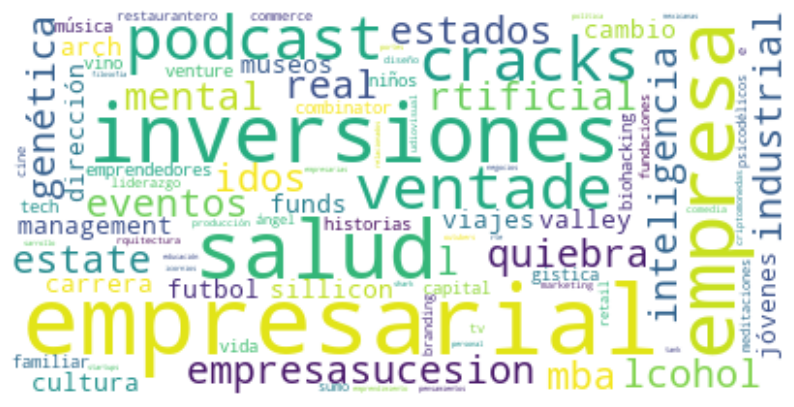

In [60]:
# create function to standarize words in titles for latin characters
def standarize_words(text):
    text = text.lower()
    # regex to get rid of punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # get rid of spanish stopwords
    text = re.sub(r'\b(de|la|que|el|en|y|a|los|del|se|las|por|un|para|con|no|una|su|al|lo|como|ms|pero|sus|le|ya)', '', text)
    return text

# generate a word cloud of the playlist titles
text = " ".join(standarize_words(playlist) for playlist in df_playlist.title)

# generate word cloud
wordcloud = WordCloud(
    max_font_size=50, max_words=100, background_color="white",
    colormap="viridis", normalize_plurals=True
    ).generate(text)

# plot word cloud
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

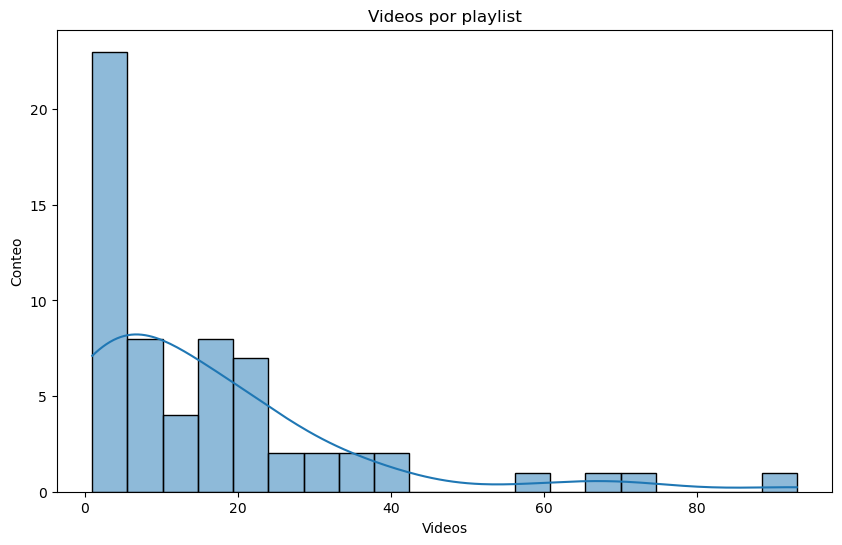

In [66]:
# histogram and kde plot of video_count 
# kde is an exponential distribution
plt.figure(figsize=(10,6))
sns.histplot(df_playlist.video_count, kde=True, bins=20)

# add title
plt.title('Videos por playlist')

# x label
plt.xlabel('Videos')

# y label 
plt.ylabel('Conteo')

plt.show()

/Users/ravj/opt/anaconda3/envs/academic-spyder-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ravj/opt/anaconda3/envs/academic-spyder-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ravj/opt/anaconda3/envs/academic-spyder-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ravj/opt/anaconda3/envs/academic-spyder-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ravj/opt/anaconda3/envs/academic-spyder-env/lib/python3.9/site-packages/IPython/core/pylabt

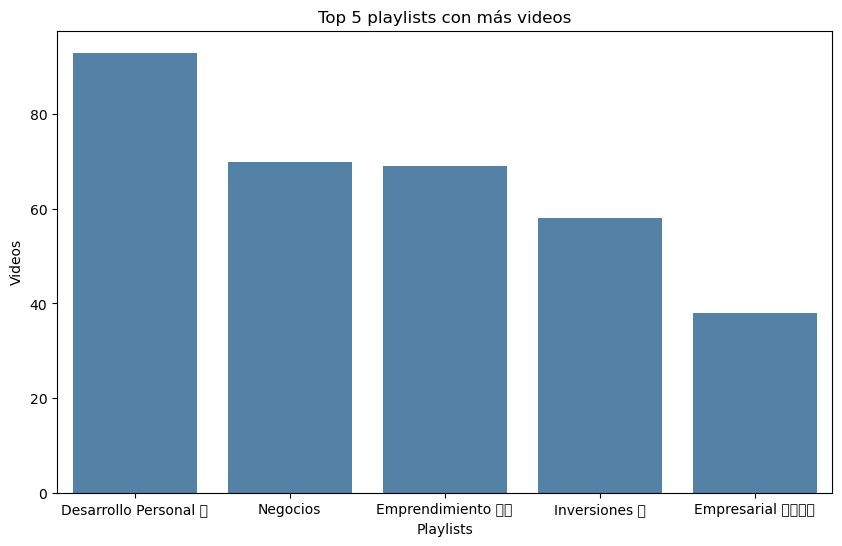

In [73]:
# col bars of the top 5 playlists with more videos
top_5_playlists = df_playlist.sort_values(by='video_count', ascending=False).head(5)

# plot
plt.figure(figsize=(10,6))
plt.rcParams['font.family'] = 'sans-serif'
sns.barplot(x='title', y='video_count', data=top_5_playlists, color='steelblue')

# add title
plt.title('Top 5 playlists con m√°s videos')

# x label
plt.xlabel('Playlists')

# y label
plt.ylabel('Videos')

plt.show()

Text(0, 0.5, 'Playlists Publicadas')

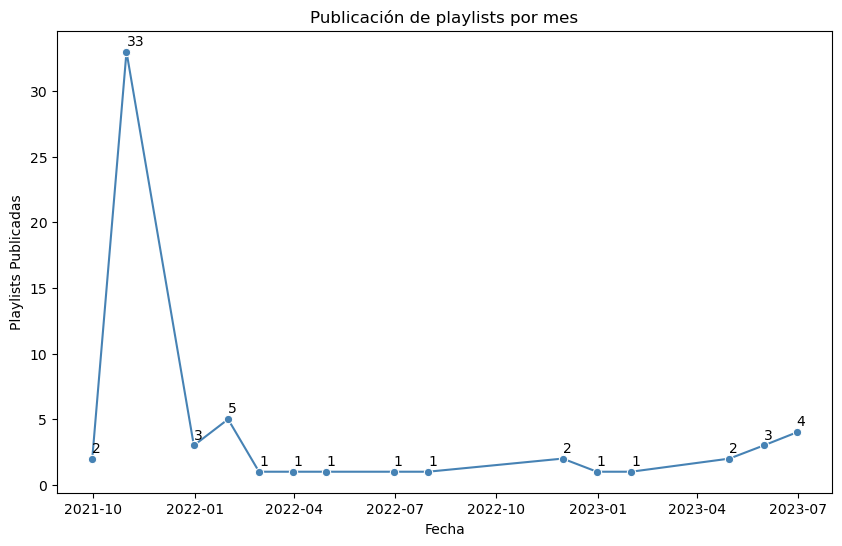

In [87]:
# time series of playlists publication
# convert to datetime
df_plot = df_playlist.copy()
df_plot["published_at"] = pd.to_datetime(df_plot["published_at"])

# set index
df_plot.set_index('published_at', inplace=True)

# resample by month
df_plot = df_plot.resample('M').count()

# drop rows with no playlists
df_plot = df_plot[df_plot.id > 0]

# subste after second month with at least one playlist
df_plot = df_plot.iloc[1:]

# plot time series
plt.figure(figsize=(10,6))
sns.lineplot(
    x=df_plot.index,
    y=df_plot.id,
    color='steelblue',
    # add also a scatterplot
    marker='o',
)
# add text to the plot
for x, y in zip(df_plot.index, df_plot.id):
    plt.text(x, y+0.5, str(y))

# add title
plt.title('Publicaci√≥n de playlists por mes')

plt.xlabel("Fecha")
plt.ylabel("Playlists Publicadas")

# Videos

In [142]:
# get final table of videos
df_videos = (
    df_videos_urls.copy()
    .drop_duplicates(subset=['id'], ignore_index=True)
    .merge(df_videos_stats, on='id', how='left')
    .assign(
        # convert to datetime 'duration' with example format 'PT2H4M44S'
        mins_duration=lambda x: pd.to_timedelta(x['duration']).dt.total_seconds() / 60,
        # convert to datetime 'published_at'
        published_at=lambda x: pd.to_datetime(x['published_at']),
        # likes per view
        likes_per_view=lambda x: (x['like_count'].astype(float) / x['view_count'].astype(float)),
        # view counts
        view_count=lambda x: x['view_count'].astype(float),
    )
    .sort_values(by='published_at', ascending=True, ignore_index=True)
    # drop rows with title = 'Private video'
    .query('title != "Private video"')
    .reset_index(drop=True)
    .drop(columns=['duration', 'dislike_count', 'favorite_count', 'is_live'])
)
df_videos.head()

id                                              title  \
0  eGwzC6GAEvE             Convierte tu miedo en tu mayor ventaja   
1  QeGMG8W9pS4  Jorge Combe. DD3 - El Metaverso, SPACS, Ayuno ...   
2  GVOl6JoQlaE  Carlos Garc√≠a. KAVAK | Creando la Startup m√°s ...   
3  nOtd8X2VZIQ  Diego Ruzzarin | Es de Sabios Cambiar de Opini...   
4  CQMSq3WifmA  Martha Debayle - Intuici√≥n, Dudas y Aceptar Qu...   

                                         description  \
0  Con este simple truco llamado reapreciaci√≥n de...   
1  Entrevista al emprendedor mexicano Jorge Combe...   
2  Entrevista de Oso Trava con Carlos Garc√≠a, fun...   
3  Entrevista con el pol√©mico Diego Ruzzarin, hab...   
4  Entrevista a Marta Debayle, la exitosa conduct...   

               published_at                         playlist_id  \
0 2019-12-27 17:17:51+00:00  PL5EDqo-XIoDCaAUZJ4tOFPX8OTq04QQmq   
1 2021-10-08 16:38:40+00:00  PL5EDqo-XIoDCKGXn7vN0k1BcZu_n3onzV   
2 2021-10-08 16:40:33+00:00  PL5EDqo-XIoDBzHhLvj8YaqczvOKGzMw-K   
3 2021-10-10 15:09:13+00:00  PL5EDqo-XIoDChxEzwJ8yBsV7H2zf1B1q3   
4 2021-10-10 15:18:31+00:00  PL5EDqo-XIoDChxEzwJ8yBsV7H2zf1B1q3   

                 channel_id  \
0  UCWVspRnU4QdsR4Av4tDWWRw   
1  UCWVspRnU4QdsR4Av4tDWWRw   
2  UCWVspRnU4QdsR4Av4tDWWRw   
3  UCWVspRnU4QdsR4Av4tDWWRw   
4  UCWVspRnU4QdsR4Av4tDWWRw   

                                           photo_url  \
0  https://i.ytimg.com/vi/eGwzC6GAEvE/maxresdefau...   
1  https://i.ytimg.com/vi/QeGMG8W9pS4/maxresdefau...   
2  https://i.ytimg.com/vi/GVOl6JoQlaE/maxresdefau...   
3  https://i.ytimg.com/vi/nOtd8X2VZIQ/maxresdefau...   
4  https://i.ytimg.com/vi/CQMSq3WifmA/maxresdefau...   

                                                tags  view_count like_count  \
0                                               None      1572.0         74   
1  [Negocios, Desarrollo inmobiliario, Inversione...     30742.0        821   
2  [oso trava, oso trava cracks, cracks podcast, ...     46464.0        863   
3  [diego ruzzarin, diego ruzzarin podcast, diego...    131739.0       3697   
4  [emprendedora, empresaria, Locutora, Conductor...     35814.0        771   

  comment_count  mins_duration  likes_per_view  
0             1       1.933333        0.047074  
1            70     135.866667        0.026706  
2            45     117.933333        0.018574  
3           348     110.983333        0.028063  
4            54      66.350000        0.021528

In [139]:
# number of videos
print('Number of videos: ', len(df_videos.id.unique()))

Number of videos:  216


<Axes: xlabel='mins_duration', ylabel='Count'>

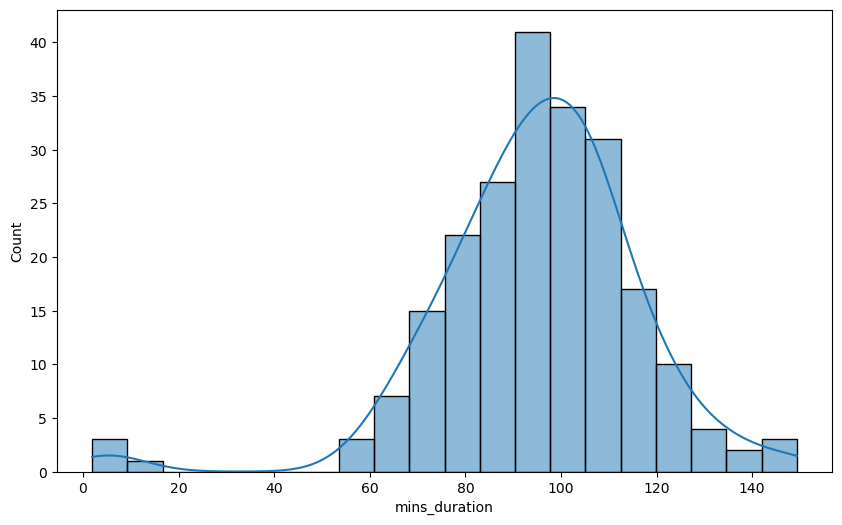

In [111]:
# distribution of mean duration
plt.figure(figsize=(10,6))
sns.histplot(df_videos.mins_duration, kde=True, bins=20)


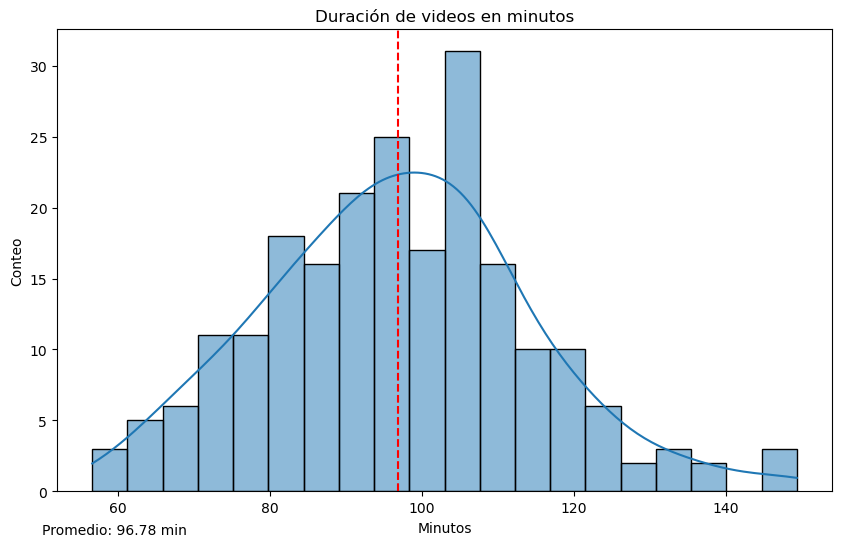

In [138]:
# look the videos with less duration
df_videos.sort_values(by='mins_duration', ascending=True).head(10)

# get rid of videos with less than 20 min duration
df_videos = df_videos[df_videos.mins_duration > 20]

# distribution of mean duration
plt.figure(figsize=(10,6))
sns.histplot(df_videos.mins_duration, kde=True, bins=20)

# add mean duration
mean_duration = df_videos.mins_duration.mean()
plt.axvline(mean_duration, color='red', linestyle='--')

# annotate mean duration bottom left
plt.annotate(
    'Promedio: {:.2f} min'.format(mean_duration),
    xy=(mean_duration, 10), xytext=(50, -3)
)

# add title
plt.title('Duraci√≥n de videos en minutos')
plt.xlabel('Minutos')
plt.ylabel('Conteo')

plt.show()

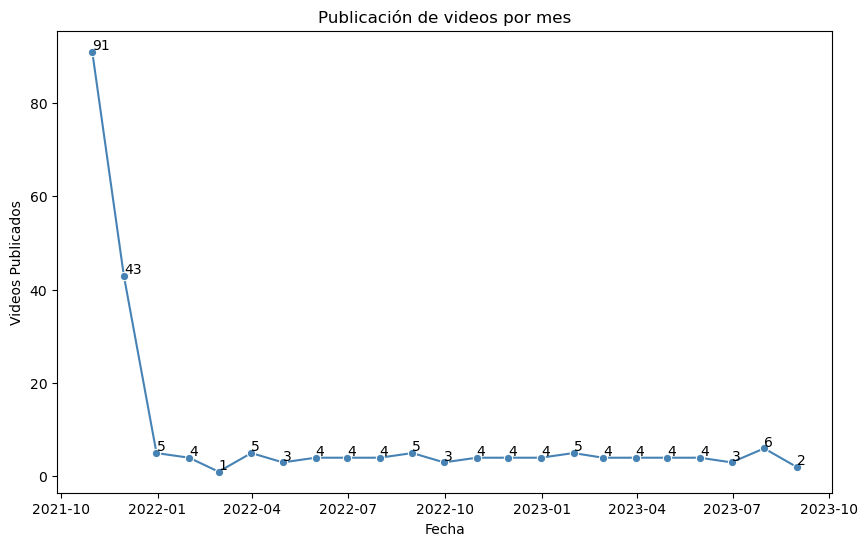

In [140]:
# published videos per month
# set index
df_plot = df_videos.copy()
df_plot.set_index('published_at', inplace=True)

# resample by month
df_plot = df_plot.resample('M').count()

# drop rows with no videos
df_plot = df_plot[df_plot.id > 0]

# plot time series
plt.figure(figsize=(10,6))
sns.lineplot(
    x=df_plot.index,
    y=df_plot.id,
    color='steelblue',
    # add also a scatterplot
    marker='o',
)
# add text to the plot
for x, y in zip(df_plot.index, df_plot.id):
    plt.text(x, y+0.5, str(y))

# add title
plt.title('Publicaci√≥n de videos por mes')

plt.xlabel("Fecha")
plt.ylabel("Videos Publicados")

plt.show()

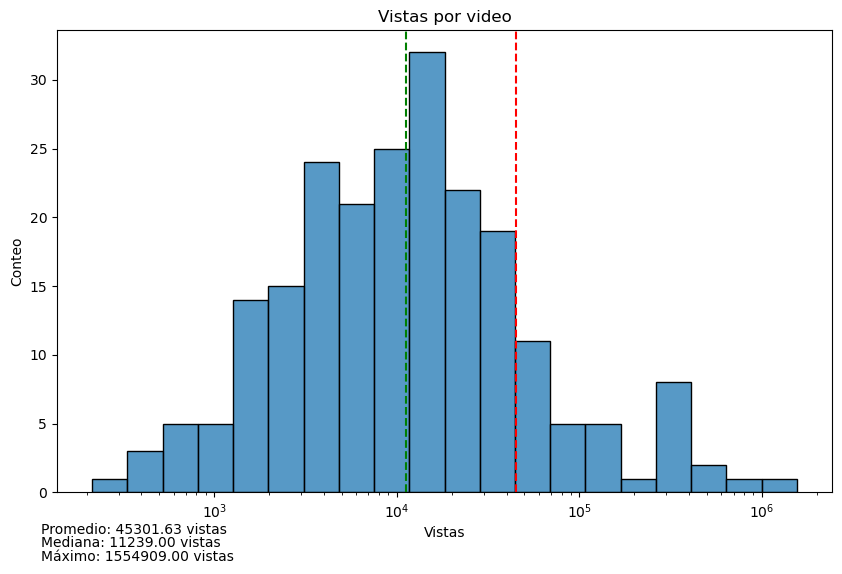

In [191]:
# distribution of views per video
plt.figure(figsize=(10,6))
sns.histplot(df_videos, x="view_count", log_scale=True, bins=20)

# add mean views
mean_views = df_videos.view_count.mean()
plt.axvline(mean_views, color='red', linestyle='--')

# add median views
median_views = df_videos.view_count.median()
plt.axvline(median_views, color='green', linestyle='--')

# annotate mean bottom left
plt.annotate(
    'Promedio: {:.2f} vistas'.format(mean_views),
    xy=(mean_views, 10), xytext=(median_views*0.01, -3)
)
# annotate median bottom left
plt.annotate(
    'Mediana: {:.2f} vistas'.format(median_views),
    xy=(median_views, 10), xytext=(median_views*0.01, -4)
)
# annotate median bottom left
plt.annotate(
    # format with comma separator for thousands'
    'M√°ximo: {:.2f} vistas'.format(df_videos.view_count.max()),
    xy=(df_videos.view_count.max(), 10), xytext=(median_views*0.01, -5)
)

# add title
plt.title('Vistas por video')
plt.xlabel('Vistas')
plt.ylabel('Conteo')

plt.show()

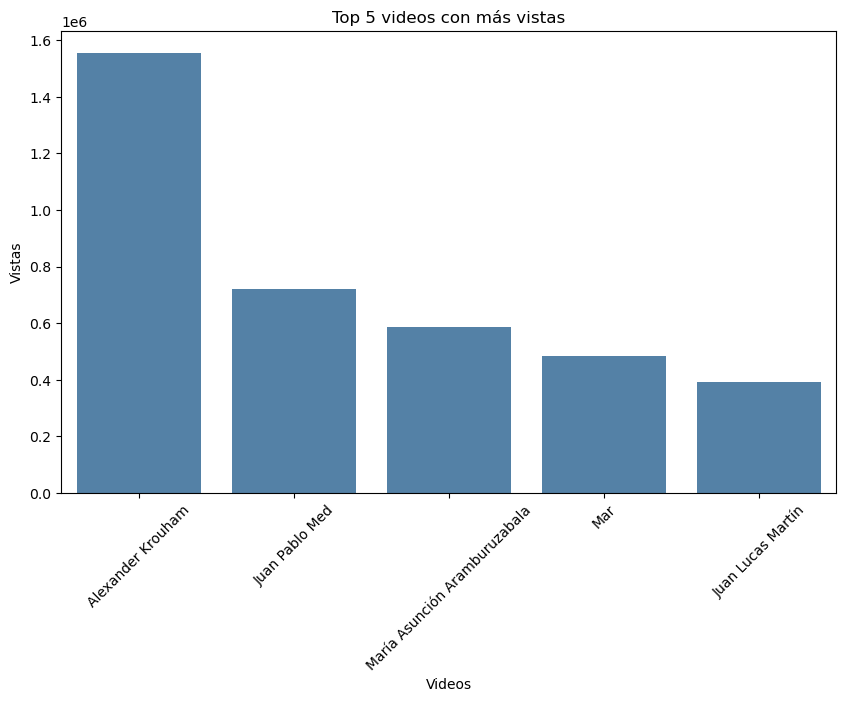

In [224]:
# views per video: top 5
top_5_videos = df_videos.sort_values(by='view_count', ascending=False).head(5)

# get words before '\bI\b' or '-'
top_5_videos['title'] = top_5_videos.title.str.extract(r'^\s*([^|]+?)\s*[|I-]', expand=False).str.strip().str.title()

# plt
plt.figure(figsize=(10,6))
plt.rcParams['font.family'] = 'sans-serif'
sns.barplot(x='title', y='view_count', data=top_5_videos, color='steelblue')

# add title
plt.title('Top 5 videos con m√°s vistas')

# x label
plt.xlabel('Videos')
# rotate x labels
plt.xticks(rotation=45)

# y label
plt.ylabel('Vistas')

plt.show()
